# Project Python Foundations:

## FoodHub Data Analysis
- Class: UT ML/AI Certificate
- Name: Daniel Levenstein
- Submission Date: 8/2/2025

In [101]:
#Python Foundations: FoodHub Data Analysis






### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing Required Libraries

In [102]:

!pip install -r requirements.txt -q
# Locking down version numbers to avoid future bugs
#Successfully installed contourpy-1.3.2 cycler-0.12.1 fonttools-4.59.0 kiwisolver-1.4.8 matplotlib-3.10.3 numpy-2.3.2 pandas-2.3.1 pillow-11.3.0 pyparsing-3.2.3 pytz-2025.2 seaborn-0.13.2 tzdata-2025.2

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.


In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [104]:
# Structure of Data
df_original = pd.read_csv('data/foodhub_order.csv')
df = df_original.copy()
# First 5 Rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]



In [105]:
# Row and Column Count
rows = df.shape[0]
columns = df.shape[1]
print(f"The foodhub_order.csv file has {rows} rows and {columns} columns")

The foodhub_order.csv file has 1898 rows and 9 columns


#### Observations:

The foodhub_order.csv file has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]
* order_id, customer_id, and food_preparation_time are all integer values.
* restaurant_name, cuisine_type, day_of_the_week, and rating are all object types.
* cost_of_the_order is float type.

In [106]:
# Data Type and Values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:

The dataset contains **5 numerical fields** and **4 categorical fields**.


**Integer Fields:**
- `order_id`
- `customer_id`
- `food_preparation_time`
- `delivery_time`

**Float Field:**
- `cost_of_the_order`

**Object Types:**
- `restaurant_name`
- `cuisine_type`
- `day_of_the_week`
- `rating`

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [107]:
# Handle Missing Values
# First, convert the 'rating' field to float (handles non-numeric values safely)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Compute the median rating (excluding NaN)
mean_rating = df['rating'].mean().round(2)

print(f"The Mean rating is {mean_rating}")
# Fill missing values with the mean
df_clean = df.copy()
df_clean['rating'] = df_clean['rating'].fillna(mean_rating)
df_clean['rating'] = df_clean['rating'].astype(int)

# Create dataframe with only rated orders
df_rated = df_clean[df_original.rating != 'Not given'].copy()
df_rated['rating'] = df_rated['rating'].astype(int)

print(f"Filling missing values with mean rating of {int(mean_rating)} and casting to integer")
df_original.rating.value_counts()


The Mean rating is 4.34
Filling missing values with mean rating of 4 and casting to integer


rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


#### Observations:

The only columns in this data set with missing values are the ratings column.
I created two new dataframew for further analysis.
* df_clean: Contains all records with missing records filled with mean rating of 4
* df_rated: Contains only records with rating data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [108]:
# Statistical Summary
df_clean.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.210748,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.603845,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,4.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:
**Food Prep Stats**

- mean food prep time: 27 minutes.
- minimum food prep time: 20 minutes.
- maximum food prep time: 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [109]:
# Unrated Orders
df_not_given = df_original['rating'] == 'Not given'
not_rated_count = df_original[df_not_given]['rating'].count()
not_rated_percent = int(not_rated_count / df_original.shape[0] * 100)
print(f"{not_rated_count} out of {df_clean.shape[0]} records are missing ratings.")
print(f"{not_rated_percent}% of orders are missing ratings.")

736 out of 1898 records are missing ratings.
38% of orders are missing ratings.


#### Observations:

736 out of 1898 records are missing ratings.

### Exploratory Data Analysis (EDA)

In [110]:
# Data Summary
df_clean.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.210748,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.603845,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,4.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


In [111]:
# Num Unique Values
for col in df_clean.columns:
    print(col,":",df_clean[col].nunique())

order_id : 1898
customer_id : 1200
restaurant_name : 178
cuisine_type : 14
cost_of_the_order : 312
day_of_the_week : 2
rating : 3
food_preparation_time : 16
delivery_time : 19


In [112]:
# Rating Stats
print(f"The mean rating is {df_rated['rating'].mean().round(2)}")
print(f"The median rating is {df_rated['rating'].sort_values().median()}")
print(f"The min rating is {df_rated['rating'].min()}")
print(f"The max rating is {df_rated['rating'].max()}")


The mean rating is 4.34
The median rating is 5.0
The min rating is 3
The max rating is 5


In [113]:
# Food Prep Time Stats
print(f"The mean prep time is {df_clean['food_preparation_time'].mean().round(2)} minutes")
print(f"The median prep time is {df_clean['food_preparation_time'].median().round(2)} minutes")
print(f"The min prep time is {df_clean['food_preparation_time'].min().round(2)} minutes")
print(f"The max prep time is {df_clean['food_preparation_time'].max().round(2)} minutes")

The mean prep time is 27.37 minutes
The median prep time is 27.0 minutes
The min prep time is 20 minutes
The max prep time is 35 minutes


In [114]:
# Delivery Time Stats
print(f"The mean delivery time is {df_clean['delivery_time'].mean().round(2)} minutes")
print(f"The median delivery time is {df_clean['delivery_time'].median().round(2)} minutes")
print(f"The min delivery time is {df_clean['delivery_time'].min().round(2)} minutes")
print(f"The max delivery time is {df_clean['delivery_time'].max().round(2)} minutes")

The mean delivery time is 24.16 minutes
The median delivery time is 25.0 minutes
The min delivery time is 15 minutes
The max delivery time is 33 minutes


In [115]:
# Cost Stats
print(f"The mean order cost is ${df_clean['cost_of_the_order'].mean().round(2)} dollars")
print(f"The median order cost is ${df_clean['cost_of_the_order'].median().round(2)} dollars")
print(f"The min order cost is ${df_clean['cost_of_the_order'].min().round(2)} dollars")
print(f"The max order cost is ${df_clean['cost_of_the_order'].max().round(2)} dollars")

The mean order cost is $16.5 dollars
The median order cost is $14.14 dollars
The min order cost is $4.47 dollars
The max order cost is $35.41 dollars


#### Day Of Week Distribution

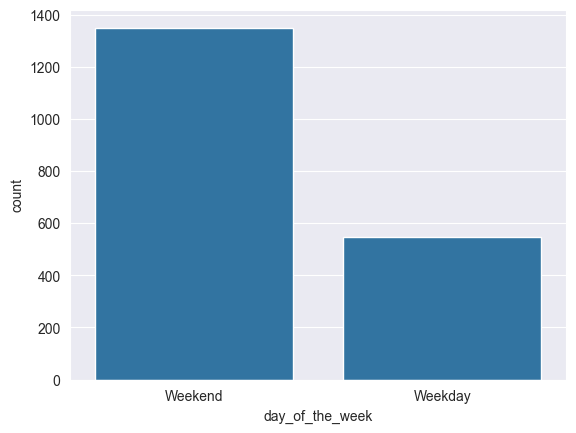

In [116]:
# Day of Week
sns.countplot(data=df_clean, x='day_of_the_week');
plt.width = 10;

#### Numerical Correlation

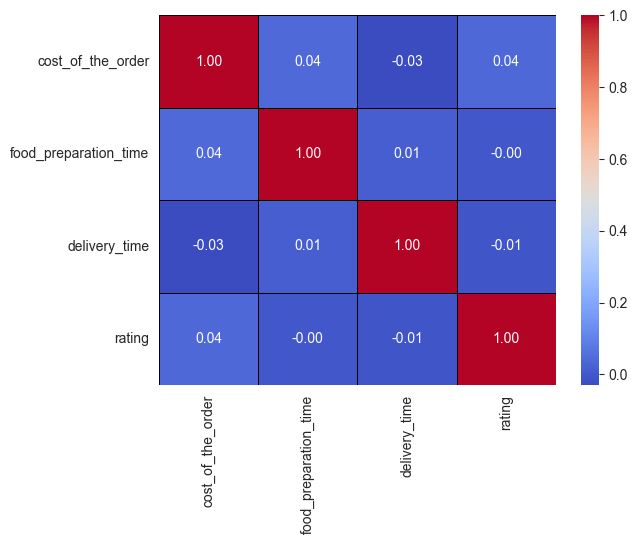

In [117]:
# Numerical Correlation Heatmap
numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
sns.heatmap(df_clean[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black', annot_kws={'size': 10});

#### Observations:

* There are 1898 total records in this data set.
* Only 61.22% of orders in this dataset are rated.
* The most represented cuisines in the dataset are American, Japanese, and Italian.
* There are more orders on the weekend than on weekdays.

**Data Cleaning:**
Unrated orders are handled by splitting my original data into 3 data sets.
* df_original: Contains all orders exactly as they are listed in the original data set.
* df_rated: Contains only orders which have existing ratings.
* df_clean: Contains all orders with unrated values replaced with the mean value of 4


### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Cuisine Type by Order Count

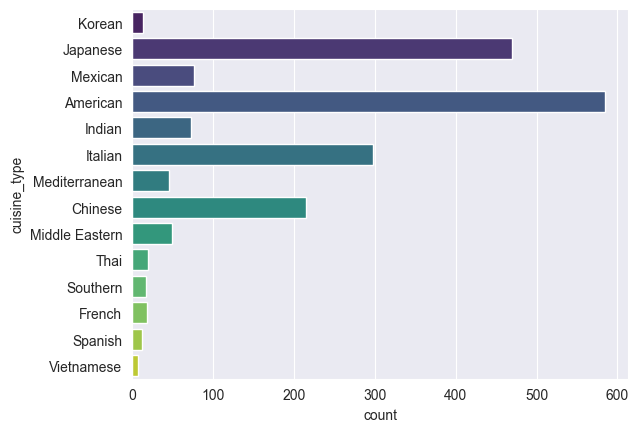

In [118]:
# Plot sorted bar chart
sns.countplot(data=df_clean, y='cuisine_type', hue='cuisine_type', palette='viridis');

#### Cost Of Order by Count

The median cost of each order is 14.6


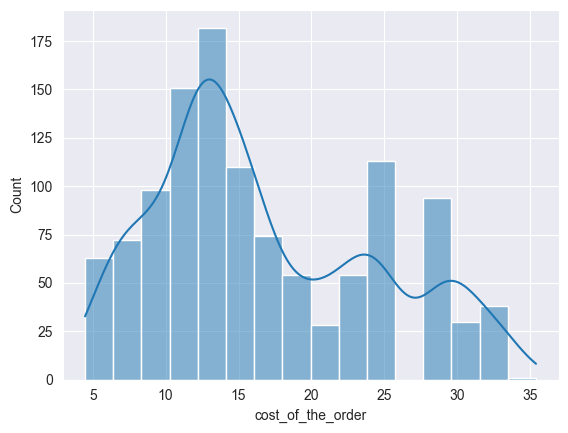

In [119]:
# The cost_of_the_order fields have a bimodal distribution.
print(f'The median cost of each order is {df_rated["cost_of_the_order"].median()}')
sns.histplot(df_rated, x='cost_of_the_order', kde=True);

#### Rating Count With Missing Values

Only 61.22% of orders are rated


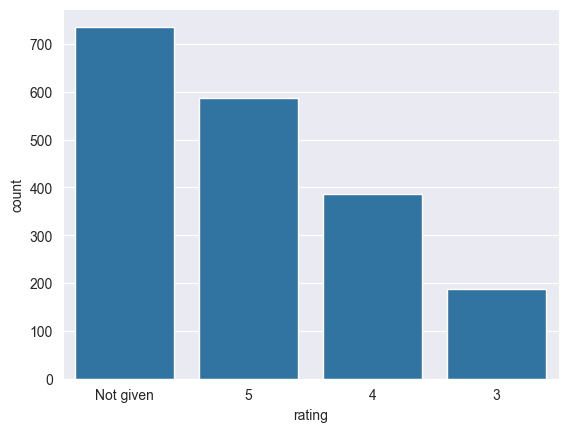

In [120]:
# There are more 5-star ratings than 4-star ratings.
# The rated orders have a linear distribution prior to interpolation.
percent_rated = df_rated['rating'].count() / df_original.shape[0] * 100
print(f"Only {percent_rated:.2f}% of orders are rated")
sns.countplot(df_original, x='rating', order=df_original['rating'].value_counts().index);



#### Rating count With Interpolation

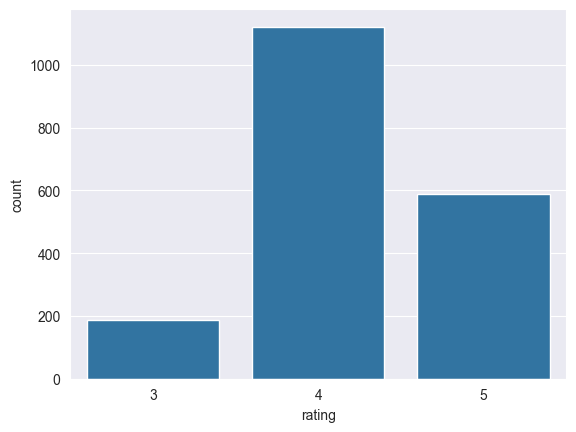

In [121]:
# After interpolation the rating values follow a normal distribution with a right skew
sns.countplot(df_clean, x='rating');

#### Food Prep Time

food_preparation_time median: 27.0


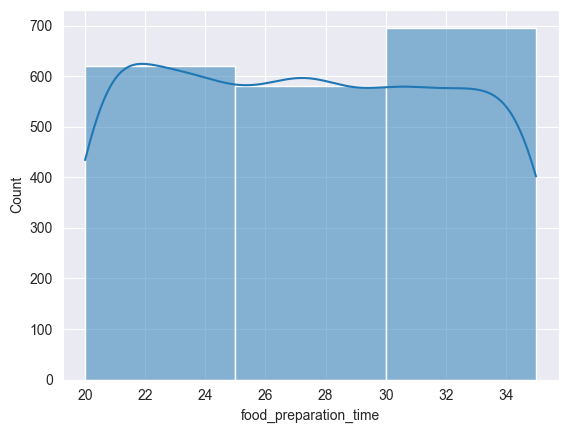

In [122]:
# Food prep time has a even distribution with a median of 27.0
print('food_preparation_time median:' , df_clean['food_preparation_time'].median())
sns.histplot(df_clean, x='food_preparation_time', kde=True, binwidth=5);

#### Delivery Time

delivery_time median: 25.0


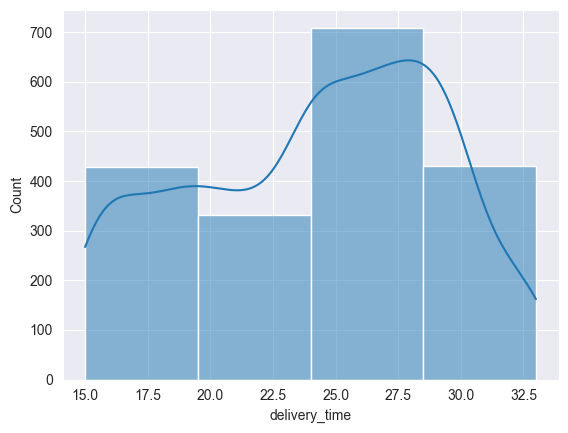

In [123]:
# Delivery time has a right leaning distribution with a median of 25.0
print('delivery_time median:' , df_clean['delivery_time'].median())
sns.histplot(df_clean, x='delivery_time', kde=True, binwidth=5);

#### Observations:
* It looks like the cost of the order plot follows a bimodal distribution.
* The median cost of each order is 14.6
* Five star ratings outnumber four-star ratings.
* The median rating is 4
* Only 61.22% of orders are rated
* The rated orders have a linear distribution prior to interpolation. 
* After interpolation, the rating values follow a normal distribution with a right skew
* Food prep time has a fairly normal distribution with a median of 27.0

**Top Orders by Number or Orders**
* Shake Shack
* The Meatball Shop
* Blue Ribbon Sushi

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [124]:
# Top 5 restaurants by number of orders
num_orders = df_clean.groupby('restaurant_name').agg(num_orders=('order_id', 'count')).sort_values(by='num_orders', ascending=False)
num_orders.head(5)

,num_orders
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The top 5 restaurants are
* Shake Shack
* The Meatball Shop
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken
* Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [125]:
# Most Popular Weekend Restaurant
most_popular_weekend = df_clean[df_clean['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1)
print(f"The most popular cuisine on the weekends is {most_popular_weekend.index[0]}")

The most popular cuisine on the weekends is American


#### Observations:
The most popular cuisine on the weekends is American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [126]:
# Percent of orders over $20
num_over_20 = df_clean[df_clean['cost_of_the_order'] > 20].shape[0]
percent = int(num_over_20 / df_clean.shape[0] * 100)
print(f"{num_over_20} out of {df_clean.shape[0]} orders or {percent}% cost more than $20")


555 out of 1898 orders or 29% cost more than $20


#### Observations:
29% or orders cost more than $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [127]:
# Mean Order Delivery Time
print(f"The mean delivery time is {df_clean['delivery_time'].mean().round(2)} minutes")


The mean delivery time is 24.16 minutes


#### Observations:
The mean delivery time is 24 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [128]:
# Most Frequent Customers
df_top_customers = df_clean.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)
df_top_customers = pd.DataFrame(df_top_customers)
df_top_customers.rename(columns={'order_id': 'num_orders'}, inplace=True)
df_top_customers.reset_index(inplace=True)
df_top_customers.head()


,customer_id,num_orders
0,52832,13
1,47440,10
2,83287,9


#### Observations:
The top 3 customer_id's by number of orders placed are:
* 52832
* 47440
* 83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cuisine Type by day of the week

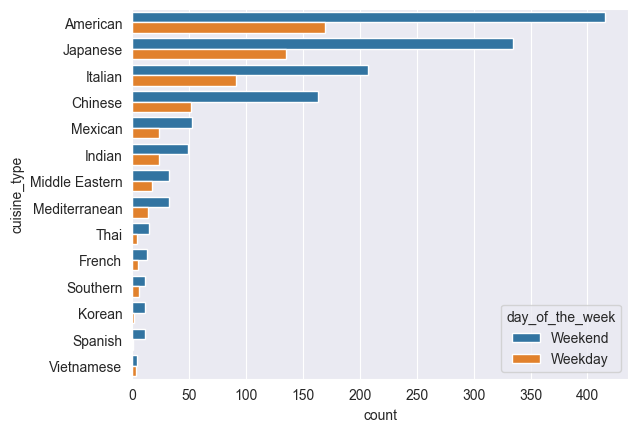

In [129]:
# Get sorted order of cuisine types
cuisine_order = df_clean['cuisine_type'].value_counts().index

# People go out to eat on the weekends more than the weeknights.
sns.countplot(df_clean, y="cuisine_type", hue='day_of_the_week', order=cuisine_order);

#### Cost of Order by Count and Rating


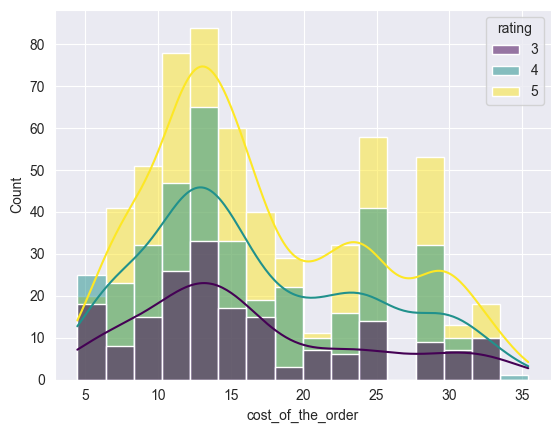

In [130]:
# It looks like the cost of the order plot follows a bimodal distribution with a stronger bi-modality for highly rated restaurants.
sns.histplot(df_rated, x='cost_of_the_order', kde=True, hue="rating", palette="viridis");



#### Cost of Order by Rating


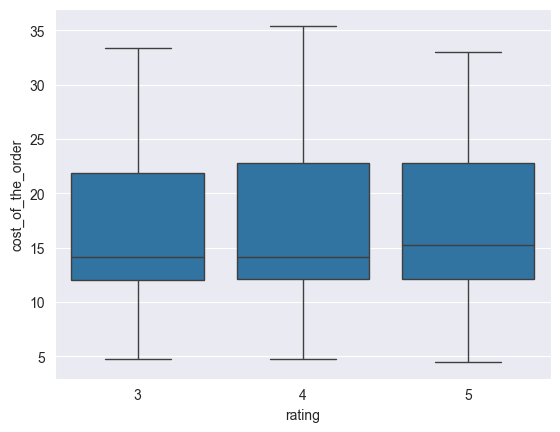

In [131]:
# Cost of order is evenly distributed across rating values.
sns.boxplot(data=df_rated, x='rating', y='cost_of_the_order');

#### Cuisine Type by Cost

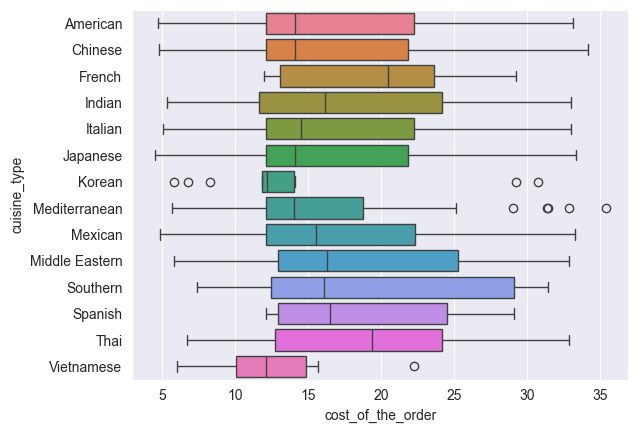

In [132]:
#The cuisine with the highest average cost is French food.
df_alphabetical_order = df_clean.sort_values(by='cuisine_type')
sns.boxplot(data=df_alphabetical_order, hue='cuisine_type', y='cuisine_type', x='cost_of_the_order');

#### Top Rated Cuisines

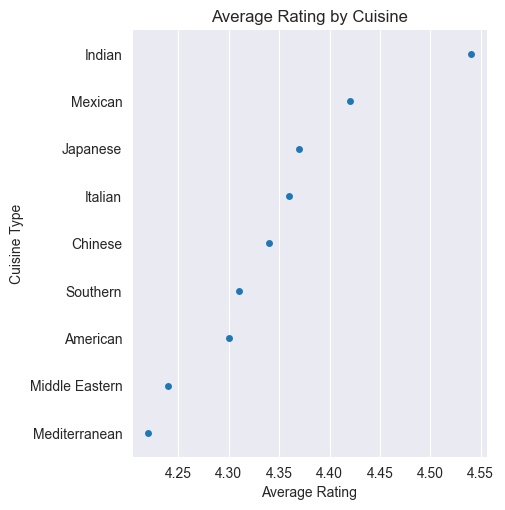

In [133]:
# I removed cuisine types with less than 10 total ratings from the data set to ensure data reliability
# The cuisines with the top ratings are Indian, Mexican, Japanese, Italian, Chinese
df_mean_rating_by_cuisine = (df_rated.groupby('cuisine_type')
    .agg(avg_rating_by_cuisine=('rating', 'mean'), num_ratings=('rating', 'count'), restaurants=('restaurant_name', 'unique'))
    .sort_values("avg_rating_by_cuisine"))
df_mean_rating_by_cuisine = pd.DataFrame(df_mean_rating_by_cuisine)
df_mean_rating_by_cuisine.sort_values("avg_rating_by_cuisine", ascending=False, inplace=True)
df_mean_rating_by_cuisine = df_mean_rating_by_cuisine[df_mean_rating_by_cuisine.num_ratings > 10]
df_mean_rating_by_cuisine["avg_rating_by_cuisine"]=df_mean_rating_by_cuisine["avg_rating_by_cuisine"].round(2)
sns.catplot(data=df_mean_rating_by_cuisine, y=df_mean_rating_by_cuisine.index, x='avg_rating_by_cuisine')
plt.title('Average Rating by Cuisine')
plt.ylabel('Cuisine Type')
plt.xlabel('Average Rating')

df_mean_rating_by_cuisine.reset_index(inplace=True)

#### Top Cuisine by Mean Rating.

In [134]:
cuisine_type_columns = ['cuisine_type','avg_rating_by_cuisine', 'num_ratings']
df_mean_rating_by_cuisine[cuisine_type_columns]

,cuisine_type,avg_rating_by_cuisine,num_ratings
0,Indian,4.54,50
1,Mexican,4.42,48
2,Japanese,4.37,273
3,Italian,4.36,172
4,Chinese,4.34,133
5,Southern,4.31,13
6,American,4.30,368
7,Middle Eastern,4.24,34
8,Mediterranean,4.22,32


#### Top Ratings by Restaurant

In [135]:
# Mean rating by restaurant
df_stats_by_restaurant = (
    df_rated.groupby('restaurant_name')
    .agg(
        avg_rating=('rating', 'mean'),
        rating_count=('rating', 'count'),
        avg_cost_of_the_order=('cost_of_the_order', 'mean'),
        avg_food_preparation_time=('food_preparation_time', 'mean'),
        cuisines=('cuisine_type', 'unique')
    ).query('rating_count > 10')
    .sort_values(by='avg_rating', ascending=False)
)
df_stats_by_restaurant.drop(columns=['rating_count'], inplace=True)

df_stats_by_restaurant['avg_rating'] = df_stats_by_restaurant['avg_rating'].round(2)
df_stats_by_restaurant['avg_cost_of_the_order'] = df_stats_by_restaurant['avg_cost_of_the_order'].round(2)
df_stats_by_restaurant['avg_food_preparation_time'] = df_stats_by_restaurant['avg_food_preparation_time'].round(2)

df_stats_by_restaurant['cuisine_type']=df_stats_by_restaurant['cuisines'].apply(lambda x: x[0])
df_stats_by_restaurant.reset_index(inplace=True)
df_stats_by_restaurant.describe()
# Mean Rating by Restaurant Table Data


,avg_rating,avg_cost_of_the_order,avg_food_preparation_time
count,27.000000,27.000000,27.000000
mean,4.315185,16.651111,27.431481
std,0.147241,2.455390,1.015009
min,4.060000,11.920000,25.310000
25%,4.210000,15.010000,26.745000
50%,4.320000,16.630000,27.410000
75%,4.410000,17.910000,28.085000
max,4.620000,21.860000,29.310000


#### Top Restaurant for each Cuisine Ttype


In [136]:
top_restaurants_by_cuisine = (df_stats_by_restaurant.groupby('cuisine_type')
                              .agg(avg_rating=('avg_rating', 'mean'), cuisine_type=('cuisine_type', 'first'), restaurant_name=('restaurant_name', 'first')))
top_restaurants_by_cuisine.avg_rating = top_restaurants_by_cuisine.avg_rating.round(2)
top_restaurants_by_cuisine.head(10)
# Mean Rating by Cuisine and Restaurant

,avg_rating,cuisine_type,restaurant_name
cuisine_type,,,
American,4.34,American,Five Guys Burgers and Fries
Chinese,4.28,Chinese,Han Dynasty
Indian,4.40,Indian,Tamarind TriBeCa
Italian,4.25,Italian,The Meatball Shop
Japanese,4.37,Japanese,Sushi of Gari Tribeca
Mediterranean,4.32,Mediterranean,Jack's Wife Freda
Mexican,4.23,Mexican,Cafe Habana
Middle Eastern,4.15,Middle Eastern,Cafe Mogador
Southern,4.36,Southern,Hill Country Fried Chicken


#### Top Restaurant Over All

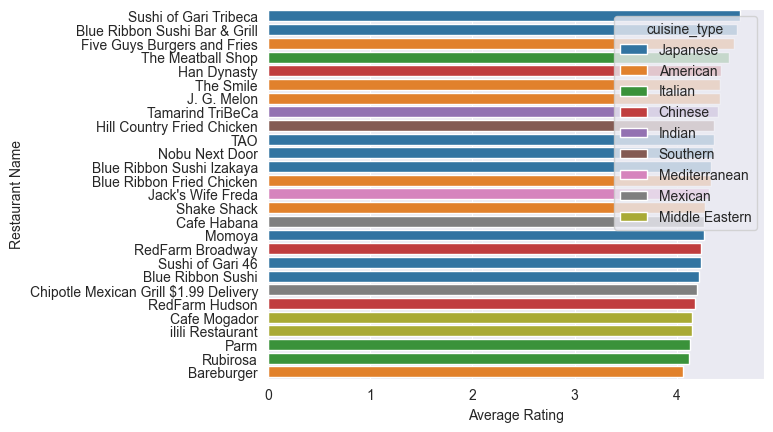

In [137]:
# Mean Ratings by Restaurant
sns.barplot(data=df_stats_by_restaurant, y='restaurant_name', x='avg_rating', hue='cuisine_type')
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Name");


#### Rating Count By Restaurant Name

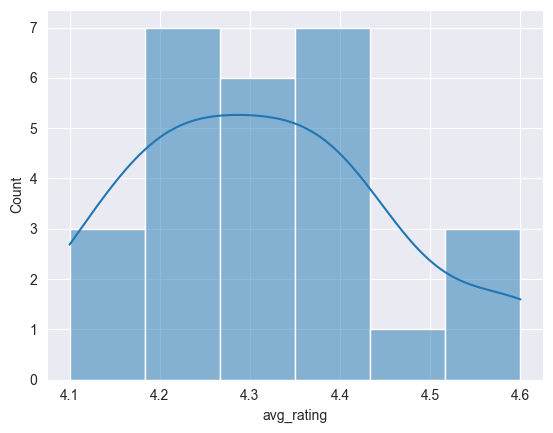

In [138]:
# The mean rating by restaurant chart has a distribution with a range of 4.1 to 4.6, and follows a normal distribution.
df_stats_by_restaurant['avg_rating'] = df_stats_by_restaurant['avg_rating'].round(1)
df_stats_by_restaurant['avg_cost_of_the_order'] = df_stats_by_restaurant['avg_cost_of_the_order'].round(2)
df_stats_by_restaurant['avg_food_preparation_time'] = df_stats_by_restaurant['avg_food_preparation_time'].round(2)
sns.histplot(df_stats_by_restaurant, x='avg_rating',  kde=True);

#### Top Restaurants by Cost

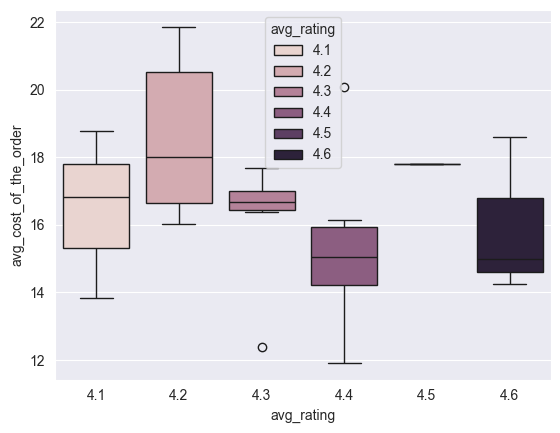

In [139]:
# Restaurants with low costs are more likely to have high ratings.
sns.boxplot(data=df_stats_by_restaurant[['avg_rating','avg_cost_of_the_order']], x='avg_rating', y='avg_cost_of_the_order', hue='avg_rating');

#### Top Restaurants by Prep Time

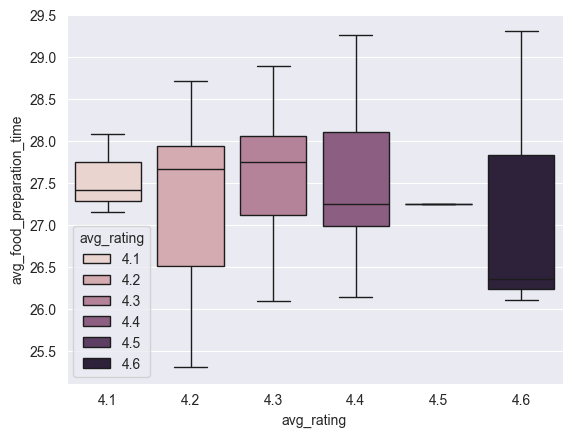

In [140]:
# Restaurants with low food prep times are more likely to have high ratings.
sns.boxplot(data=df_stats_by_restaurant, x='avg_rating', y='avg_food_preparation_time', hue='avg_rating');

#### Strength Of Correlation

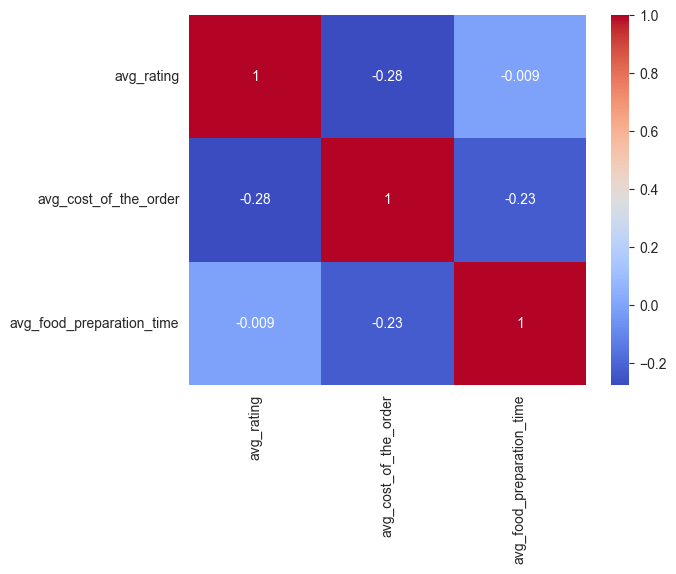

In [141]:
sns.heatmap(df_stats_by_restaurant[['avg_rating', 'avg_cost_of_the_order','avg_food_preparation_time']].corr(), annot=True,  cmap='coolwarm');

#### Observations:
**Highest Correlation**
* Application demand is higher on weekends than weeknights.
* Cuisine Type and rating had a strong correlation.
* The top-rated cuisines were Indian, Mexican, Japanese
* The cuisine with the highest average rating is Indian food.
* The most expensive food is French food.

**Additional Observations**
* Restaurants with quick service times are more likely to have high ratings.
* Restaurants with low costs are more likely to have high ratings.
* Cost of order is evenly distributed across rating values.

##### Cuisine Trends and Restaurant Performance Metrics
**Top Cuisines by Rating**
* Indian
* Mexican
* Japanese

**Highest Rated Restaurants**
* Number 1: "Suchi of Gari Tibeca"
* Number 2: "Blue Ribbon Suchi Bar & Grill"
* Number 3: "Five Guys Burgers and Fries"

**Top Restaurants by Cuisine Type**

*	The top American restaurant is "Five Guys Burgers and Fries"
*   The top Chinese restaurant is "Han Dynasty"
*	The top Indian restaurant is "Tamarind TriBeCa"

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

,avg_rating,rating_count,cuisine_type
restaurant_name,,,
The Meatball Shop,4.33,132,Italian
Blue Ribbon Fried Chicken,4.22,96,American
RedFarm Broadway,4.17,59,Chinese
Shake Shack,4.17,219,American
Blue Ribbon Sushi,4.13,119,Japanese
RedFarm Hudson,4.11,55,Chinese
Parm,4.07,68,Italian


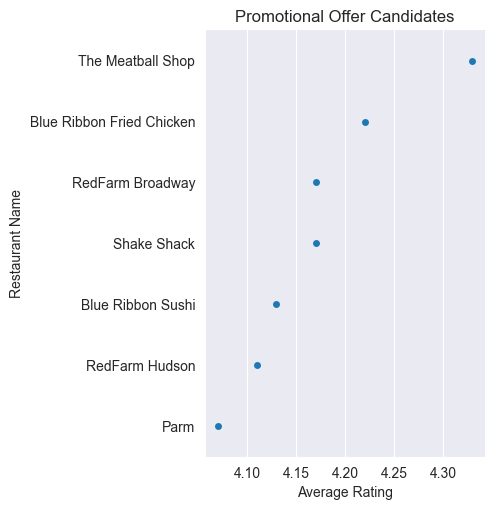

In [142]:
# Promotional Offer
df_promotional_offer = (
    df_clean.groupby('restaurant_name')
    .agg(avg_rating=('rating', 'mean'), rating_count=('rating', 'count'), cuisine_type=('cuisine_type', 'first'))
    .query('avg_rating > 4 and rating_count > 50')
    .sort_values(by='avg_rating', ascending=False)
)
df_promotional_offer.avg_rating = df_promotional_offer.avg_rating.round(2)
sns.catplot(data=df_promotional_offer, x='avg_rating', y='restaurant_name')
plt.title('Promotional Offer Candidates')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Name')
df_promotional_offer.head(10)

#### Observations:

There are 7 restaurants who would qualify for this promotion.
* The Meatball Shop
* Blue Ribbon Fried Chicken
* Shake Shack
* RedFarm Broadway
* Shake Shack
* Blue Ribbon Sushi
* RedFarm Hudson
* Parm


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [143]:
 # Company Revenue
df_net_revenue = df_clean.copy()
df_net_revenue["revenue"] = \
    (df_net_revenue.apply
     (lambda row: row["cost_of_the_order"] *
                  (.25
                   if row["cost_of_the_order"] > 20
                     else .15
if row["cost_of_the_order"] > 5
                  else 0), axis=1))
df_net_revenue["revenue"] = df_net_revenue["revenue"].round(2)
print(f'Total Revenue: ${df_net_revenue["revenue"].sum():.2f}')
print(f'Average Revenue per order: ${df_net_revenue.revenue.mean().round(2):.2f}')


Total Revenue: $6166.40
Average Revenue per order: $3.25


#### Observations:
* The total revenue for this company is $6166.40
* Average revenue per order: $3.25


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [144]:
# Total Delivery Time
df_long_delivery = df_clean.copy()
df_long_delivery['total_time'] = df_long_delivery['food_preparation_time']+df_long_delivery['delivery_time']
df_long_delivery = df_long_delivery[df_long_delivery['total_time'] > 60]
num_total_orders = df_clean.shape[0]
num_long_delivery = df_long_delivery.shape[0]


print(f'{num_long_delivery/num_total_orders:.2%} orders take more than 60 minutes to get delivered')
print(f'The average rating of these orders is {df_long_delivery.rating.mean().round(2):.2f}')



10.54% orders take more than 60 minutes to get delivered
The average rating of these orders is 4.21


 #### Observations:
10.54% orders take more than 60 minutes to get delivered, the average rating of these orders is 4.21.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

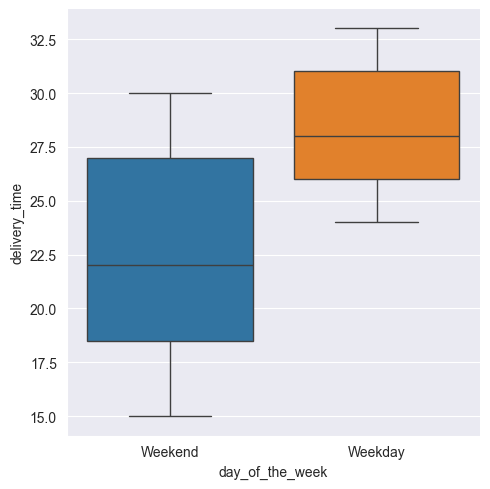

In [145]:
# Delivery time by Day of the Week
sns.catplot(data=df_clean, x='day_of_the_week', y='delivery_time', hue='day_of_the_week', kind='box');

#### Observations:
The mean delivery time on Weekends is 22.5 minutes while the mean delivery time on weekdays is 27.5 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* The delivery time is faster on weekends than on weeknights.
* The cuisines with the top ratings were Indian, Mexican, Japanese, Italian, Chinese
* The average rating for orders that took more than 60 minutes for delivery was 4.2
* Average Revenue per order: $3.25


### Recommendations:
1. **Improve App Search Functionality**
   Allow users to filter restaurants by cuisine and cost to simplify decision-making.

2. **Highlight "Cuisine of the Week"**
   Feature a rotating selection of top-rated cuisines.

3. **Run Targeted Promotions**
   Offer promotional deals at well-rated, high-volume restaurants to maintain loyalty and boost revenue. Sample candidates include:
   - The Meatball Shop *(Italian)*
   - Blue Ribbon Fried Chicken *(American)*
   - RedFarm Broadway *(Chinese)*
   - Shake Shack *(American)*
   - Blue Ribbon Sushi *(Japanese)*
4. **Reward App Loyalty**
   Offer 20% discount voucher to the following customers:

In [146]:
df_top_customers["customer_id"]

0    52832
1    47440
2    83287
Name: customer_id, dtype: int64

### Charts and Graphs

#### Promotional Offer

In [147]:
# The following restaurants qualify for the promotional offer the client wants to run.
df_promotional_offer.head(10)

,avg_rating,rating_count,cuisine_type
restaurant_name,,,
The Meatball Shop,4.33,132,Italian
Blue Ribbon Fried Chicken,4.22,96,American
RedFarm Broadway,4.17,59,Chinese
Shake Shack,4.17,219,American
Blue Ribbon Sushi,4.13,119,Japanese
RedFarm Hudson,4.11,55,Chinese
Parm,4.07,68,Italian


#### Top Restaurants Over All

In [148]:
df_stats_by_restaurant.head()

,restaurant_name,avg_rating,avg_cost_of_the_order,avg_food_preparation_time,cuisines,cuisine_type
0,Sushi of Gari Tribeca,4.6,14.98,29.31,[Japanese],Japanese
1,Blue Ribbon Sushi Bar & Grill,4.6,14.25,26.36,[Japanese],Japanese
2,Five Guys Burgers and Fries,4.6,18.60,26.11,[American],American
3,The Meatball Shop,4.5,17.81,27.25,"[Italian, American]",Italian
4,Han Dynasty,4.4,14.13,28.04,[Chinese],Chinese


### Top Restaurants By Cuisine


In [149]:
top_restaurants_by_cuisine.head(10)

,avg_rating,cuisine_type,restaurant_name
cuisine_type,,,
American,4.34,American,Five Guys Burgers and Fries
Chinese,4.28,Chinese,Han Dynasty
Indian,4.40,Indian,Tamarind TriBeCa
Italian,4.25,Italian,The Meatball Shop
Japanese,4.37,Japanese,Sushi of Gari Tribeca
Mediterranean,4.32,Mediterranean,Jack's Wife Freda
Mexican,4.23,Mexican,Cafe Habana
Middle Eastern,4.15,Middle Eastern,Cafe Mogador
Southern,4.36,Southern,Hill Country Fried Chicken


#### Top Restaurant by Number or Orders

In [150]:
num_orders = df_clean.groupby('restaurant_name').agg(num_orders=('order_id', 'count')).sort_values(by='num_orders', ascending=False)
num_orders.head(5)

,num_orders
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
